# Numpy and Matplotlib synthesis exercise


Read the data file `Variability_Catalina_list1.csv` which contains lightcurves of an ensemble of objects observed in the context of the Catalina survey (http://nesssi.cacr.caltech.edu/DataRelease/). 

This file contains the following columns separated by 'tab' characters: `InputID	ID	Mag	Magerr	RA	Decl	MJD	Blend`. Their meaning is the following: 
* [0] `InputID`: Object Name 
* [1] `ID`: Object ID in the survey
* [2] `Mag`: Object Magnitude ($ m = -2.5 * \log(Flux)$ + zeropoint)
* [3] `Magerr`: Formal error on the magnitude
* [4] `RA`: Right ascension  (degrees)
* [5] `Decl`: Declination  (degrees)
* [6] `MJD`: Modified julian day (day). 
* [7] `Blend`: 0 if the measurement is clean, 1 if there is a possible contamination by another target. 

The file contains the observed magnitude of the following (gravitationally lensed) quasars: 'DESJ0407-5006', 'HE1104-1805', 'HS2209+1914' 'J0011-0845', 'J0228+3953', 'Q1355-2257', 'SDSSJ0904+1512'. 
You want to visualise the lightcurve (x=MJD, y=Mag, yerr=Maggerr) associated to each individual object. You also want to measure its mean magnitude, and the standard deviation on the magnitude, as well as its minimum / maximum magnitude over the period of observation and save those value into a table. Try to reach this goal using only "standard" python commands and commands from numpy and matplotlib arrays. To ease your task, a possible methodology is outlined below.  

**Possible methodology:**
- (1) Read the file and save the output into a numpy array. How many rows and columns does contain the array ? What is the dtype of your array ? 
- (2) Create a sub-array for a single object (e.g. HS2209+1914) using fancy indexing. 
- (3) create an array with 4 columns `MJD, Mag, magerr, blend` , converting strings to floats.
- (4) Get rid of data points with Blend > 0 
- (5) Plot the lightcurve at the screen 
- (6) Calculates mean, std, min, max with numpy 
- (7) Repeat the operation for the 7 object using a for loop.i.e. you can create a list of arrays, each one containing MJD, mag, magerr for each object. In the same loop you can make a plot. You can include the plotting in the loop. To plot into a single figure, think of using plt.subplots(rows=7, figsize=(15,20)). 
- BONUS: How would you proceed to know the names of the individual objects if I did not provide the list ? 

**TIPs:** 

* A file's row mixes strings and floats. You may therefore first create an array of strings (1 single dtype in an array). One of the arguments of `np.loadtxt()` is the data type, so you can read a list of strings with `np.loadtxt(filename, dtype=str)`
* To convert an array of numbers whose type is strings into float: 
``` python 
myarray_strings = np.array(['1', '2', '3'])  
myarray_floats = np.array(myarray_strings , dtype = float)
```

Here is the mean magnitude : 19.415384615384617
Here is the standard variation : 0.48859477286500513
Here is the minimum magnitude : 17.04 and the maximum magnitude : 20.52


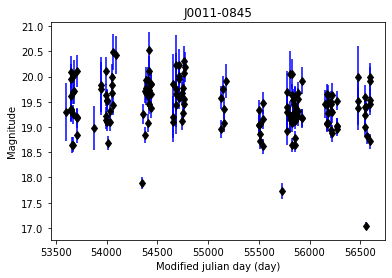

In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# We first read the file as a list of strings
data = np.loadtxt('Variability_Catalina_list1.csv', dtype=str)
a = np.shape(data)
data.dtype
# So we see here that we only have strings in our data array

# We create a sub array for every object and we include it in a list
object1 = []
for i in range(2308) :
    for j in range(8) : 
        if data[i,0] == data[0,0] : 
            object1.append(data[i,j])
            
first = np.array(object1)
a = np.shape(first)
first_object = first.reshape((int(a[0] / 8), 8))
b = np.shape(first_object)
#print(np.shape(first_object))

# Then we have to create one sub-array containing Mag, magerr, MJD, blend and we convert it into float
col = []
for i in range(157) :
    for j in range(8) : 
        if j == 2 or j == 3 or j == 6 or j == 7 : 
            col.append(first_object[i,j])
column = np.array(col)
columns = np.array(column.reshape(int((len(column)+2) / 4), 4), dtype = float)

# We get rid of points for which Blend > 0 
d = np.shape(columns)
good_points = []
for i in range(d[0]) : 
    if columns[i,3] == 0 : 
        for j in range(4) : 
            good_points.append(columns[i,j])

good_ones = np.array(good_points)           
good = np.array(good_ones.reshape(int((len(good_ones)+2) / 4), 4))

# Then we plot the MJD for the axis, Mag for the y axis and magerr for the y error
e = np.shape(good)
for i in range(e[0]) : 
    plt.plot(good[i,2], good[i,0], marker='d', color ='black')
    plt.errorbar(good[i,2], good[i,0], good[i,1], 0, color='b', ls='')
    plt.xlabel('Modified julian day (day)')
    plt.ylabel('Magnitude')
    plt.title(data[0,0])
    
magnitude = []
for i in range(e[0]) : 
    magnitude.append(good[i,0])

Magnitude = np.array(magnitude)
print('Here is the mean magnitude :' ,Magnitude.mean())
print('Here is the standard variation :', Magnitude.std())
print('Here is the minimum magnitude :', Magnitude.min(), 'and the maximum magnitude :', Magnitude.max())